# This script shows how to use the various options for olivine-liquid thermometry, including tests for equilibrium
- we recomend you first got through the "Liquid_only thermometry.ipynb" example, as this demonstrates the various options for H2O and P which are also relevant here. 

#### You need to install Thermobar once on your machine, if you haven't done this yet, uncomment the line below (remove the #)

In [ ]:
#!pip install Thermobar

In [1]:
# Loading various python things
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt

In [2]:
# Setting plotting parameters
# This sets some plotting things
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

# Step 1 - load data

In [3]:
out=pt.import_excel('Liquid_only_Thermometry.xlsx', sheet_name="Liquids")
my_input=out['my_input']
myLiquids1=out['Liqs']
myOls1=out['Ols']
display(myOls1.head())
display(myLiquids1.head())

,SiO2_Ol,TiO2_Ol,Al2O3_Ol,FeOt_Ol,MnO_Ol,MgO_Ol,CaO_Ol,Na2O_Ol,K2O_Ol,Cr2O3_Ol,NiO_Ol
0,40.5,0.02,0.08,12.40,0.17,47.4,0.30,0.0,0,0.03,0.0
1,41.3,0.03,0.11,9.59,0.14,50.2,0.31,0.0,0,0.00,0.0
2,39.7,0.05,0.11,15.60,0.18,44.5,0.31,0.0,0,0.03,0.0
3,40.5,0.05,0.10,13.20,0.18,46.8,0.29,0.0,0,0.02,0.0
4,40.5,0.00,0.10,9.41,0.10,49.3,0.31,0.0,0,0.00,0.0


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,57.023602,0.623106,16.332899,4.36174,0.103851,4.19180,6.94858,3.59702,0.896895,0.000000,0.226584,5.59,0.0,0.0,0.0,0.0,0
1,57.658600,0.654150,17.194799,3.90621,0.084105,2.86892,5.91538,3.85948,1.018600,0.000000,0.214935,6.55,0.0,0.0,0.0,0.0,1
2,60.731201,0.862054,17.144199,4.07781,0.077488,2.50867,5.22075,4.45556,1.414160,0.000000,0.319638,3.14,0.0,0.0,0.0,0.0,2
3,61.532799,0.440860,16.508801,3.32990,0.037520,1.64150,4.34294,4.40860,1.407000,0.000000,0.215740,6.20,0.0,0.0,0.0,0.0,3
4,52.969101,0.803412,17.563000,5.93217,0.149472,3.78351,7.65110,3.80219,0.551178,0.037368,0.196182,6.58,0.0,0.0,0.0,0.0,4


# Example 1 - Simple calculation using H2O column in user-entered spreadsheet, P from P_kbar column
- It has been shown many times that olivines are not in equilirium with their co-erupted carrier melts. Thus, it is difficult to know what a meaningful Ol-Liq match is. Because of this, by default we return the value of Kd calculated for olivine-liquid as well as the calculated temperature
- by default, this uses the Fe3Fet_Liq column in the user-entered spreadsheet, and calculates Fe/Mg in the liquid using only Fe2+
- If the user doesn't specify a column for Fe3Fet in the input, this value is set to zero. 

In [4]:
eq22_PHinput=pt.calculate_ol_liq_temp(liq_comps=myLiquids1, ol_comps=myOls1,  equationT="T_Put2008_eq22", 
                                      P=my_input['P_kbar'], Fe3Fet_Liq=0.15)
eq22_PHinput

,T_K_calc,Kd (Fe-Mg) Meas
0,1289.947705,0.295778
1,1229.813416,0.165066
2,1285.857491,0.253724
3,1198.240159,0.163576
4,1259.174284,0.143220
5,1244.931462,0.150168
6,1241.300118,0.203215
7,1199.601831,0.380893
8,1162.693468,0.295638
9,1339.466029,0.403892


### If you specify eq_tests=True, it will also return calculated Kd values for olivine-Liquid pairs so you can assess if olivine-liquids are in equilibrium. 
- A number of different equilibrium tests are returned, using Toplis, Matzen and Roeder and Emslie (preferred value=0.3 for Roeder and Emslie, 1970, =0.34 for Matzen, function of melt comp, temp and press for Toplis). 

In [5]:
eq22_PHinput=pt.calculate_ol_liq_temp(liq_comps=myLiquids1, ol_comps=myOls1,  
                                      equationT="T_Put2008_eq22", P=my_input['P_kbar'], eq_tests=True)
eq22_PHinput

,T_K_calc,Kd Meas,Kd calc (Toplis),"ΔKd, Toplis","ΔKd, Roeder","ΔKd, Matzen",SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,...,Al2O3_Ol_cat_frac,Na2O_Ol_cat_frac,K2O_Ol_cat_frac,MnO_Ol_cat_frac,TiO2_Ol_cat_frac,DMg_Meas,CNML,CSiO2L,NF,Den_Beat93
0,1289.947705,0.251411,0.325040,0.073629,0.048589,0.088589,57.023602,0.623106,16.332899,4.36174,...,0.000772,0.0,0.0,0.001179,0.000123,9.472619,0.170395,0.557471,-0.761843,9.819071
1,1229.813416,0.140306,0.308684,0.168377,0.159694,0.199694,57.658600,0.654150,17.194799,3.90621,...,0.001039,0.0,0.0,0.000950,0.000181,14.186789,0.137941,0.570023,-0.816654,10.303635
2,1285.857491,0.215666,0.315891,0.100225,0.084334,0.124334,60.731201,0.862054,17.144199,4.07781,...,0.001083,0.0,0.0,0.001273,0.000314,15.531216,0.122184,0.579288,-0.792785,10.250501
3,1198.240159,0.139039,0.296719,0.157679,0.160961,0.200961,61.532799,0.440860,16.508801,3.32990,...,0.000967,0.0,0.0,0.001250,0.000309,23.753206,0.097626,0.605753,-0.767076,10.715090
4,1259.174284,0.121737,0.323766,0.202028,0.178263,0.218263,52.969101,0.803412,17.563000,5.93217,...,0.000963,0.0,0.0,0.000692,0.000000,10.781292,0.186877,0.523030,-0.842157,10.215321
5,1244.931462,0.127643,0.324986,0.197343,0.172357,0.212357,54.050201,0.857348,17.333300,5.60072,...,0.000964,0.0,0.0,0.001039,0.000123,12.276130,0.168070,0.533835,-0.833465,10.295063
6,1241.300118,0.172732,0.333878,0.161146,0.127268,0.167268,55.656300,0.897984,17.117800,5.31307,...,0.002155,0.0,0.0,0.001056,0.000250,14.083460,0.145845,0.547483,-0.820914,10.324021
7,1199.601831,0.323759,0.391378,0.067619,0.023759,0.016241,49.054699,0.488832,14.665000,5.83168,...,0.000595,0.0,0.0,0.001353,0.000253,7.372298,0.220053,0.554209,-0.789502,9.845140
8,1162.693468,0.251292,0.361834,0.110542,0.048708,0.088708,50.625099,0.334074,16.875000,5.01968,...,0.000594,0.0,0.0,0.001564,0.000316,10.509878,0.180293,0.551305,-0.873502,10.229233
9,1339.466029,0.343308,0.299720,0.043588,0.043308,0.003308,51.403301,0.663880,18.019600,5.98440,...,0.000589,0.0,0.0,0.001411,0.000188,7.070601,0.228386,0.498172,-0.840523,9.673734


- If you want to access just the temperature from this panda dataframe, you do name['column heading']

In [6]:
Teq22_PHinput=eq22_PHinput['T_K_calc']-273.15 #converting temp to C
Teq22_PHinput

0    1016.797705
1     956.663416
2    1012.707491
3     925.090159
4     986.024284
5     971.781462
6     968.150118
7     926.451831
8     889.543468
9    1066.316029
Name: T_K_calc, dtype: float64

- Can also filter outputs, to only look at temps for pairs with delta K<=0.03

In [9]:
T_in_eq=eq22_PHinput.loc[eq22_PHinput['ΔKd, Roeder']<=0.03]
T_in_eq

,T_K_calc,Kd Meas,Kd calc (Toplis),"ΔKd, Toplis","ΔKd, Roeder","ΔKd, Matzen",SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,...,Al2O3_Ol_cat_frac,Na2O_Ol_cat_frac,K2O_Ol_cat_frac,MnO_Ol_cat_frac,TiO2_Ol_cat_frac,DMg_Meas,CNML,CSiO2L,NF,Den_Beat93
7,1199.601831,0.323759,0.391378,0.067619,0.023759,0.016241,49.054699,0.488832,14.665,5.83168,...,0.000595,0.0,0.0,0.001353,0.000253,7.372298,0.220053,0.554209,-0.789502,9.84514


### You can also overwrite the user-entered Fe3Fet_Liq in the function itself
- Here, we peform calculations using 30% Fe3+

In [10]:
eq22_PHinput_30Fe3=pt.calculate_ol_liq_temp(liq_comps=myLiquids1, ol_comps=myOls1,  
                                      equationT="T_Put2008_eq22", P=my_input['P_kbar'], Fe3Fet_Liq=0.3)
eq22_PHinput_30Fe3

,T_K_calc,Kd (Fe-Mg) Meas
0,1289.947705,0.359158
1,1229.813416,0.200438
2,1285.857491,0.308094
3,1198.240159,0.198628
4,1259.174284,0.173911
5,1244.931462,0.182347
6,1241.300118,0.246761
7,1199.601831,0.462513
8,1162.693468,0.358989
9,1339.466029,0.490441


# There are also a number of functions to assess olivine-liquid equilibrium

## Example 2a - Calculating equilibrium olivine Fo contents based on the liquid composition
- Here, using the Kd model of Roeder and Emslie, 1970, Kd=0.03+-0.03, for 20% Fe3

In [11]:
Eq_Ol_Roeder=pt.calculate_eq_ol_content(liq_comps=myLiquids1, Kd_model="Roeder1970", Fe3Fet_Liq=0.2)
Eq_Ol_Roeder

,Mg#_Liq_Fe2,Mg#_Liq_Fet,"Eq Fo (Roeder, Kd=0.3)","Eq Fo (Roeder, Kd=0.33)","Eq Fo (Roeder, Kd=0.27)"
0,0.681666,0.631416,0.877117,0.866470,0.888030
1,0.620707,0.566947,0.845080,0.832188,0.858378
2,0.578196,0.523041,0.820442,0.805970,0.835443
3,0.523445,0.467721,0.785468,0.768971,0.802688
4,0.586967,0.532031,0.825694,0.811549,0.840342
5,0.565465,0.510056,0.812653,0.797709,0.828169
6,0.528731,0.473003,0.789019,0.772716,0.806025
7,0.620033,0.566244,0.844705,0.831788,0.858030
8,0.583864,0.528846,0.823846,0.809585,0.838619
9,0.665729,0.614386,0.869086,0.857856,0.880615


### If you also specify the olivine compositions, it will add the measured Fo content as a column for comparison

In [12]:
Eq_Ol_Roeder=pt.calculate_eq_ol_content(liq_comps=myLiquids1, ol_comps=myOls1, Kd_model="Roeder1970", Fe3Fet_Liq=0.2)
Eq_Ol_Roeder

,Mg#_Liq_Fe2,Mg#_Liq_Fet,"Eq Fo (Roeder, Kd=0.3)","Eq Fo (Roeder, Kd=0.33)","Eq Fo (Roeder, Kd=0.27)",Fo_meas
0,0.681666,0.631416,0.877117,0.866470,0.888030,0.872023
1,0.620707,0.566947,0.845080,0.832188,0.858378,0.903203
2,0.578196,0.523041,0.820442,0.805970,0.835443,0.835656
3,0.523445,0.467721,0.785468,0.768971,0.802688,0.863386
4,0.586967,0.532031,0.825694,0.811549,0.840342,0.903278
5,0.565465,0.510056,0.812653,0.797709,0.828169,0.890781
6,0.528731,0.473003,0.789019,0.772716,0.806025,0.838609
7,0.620033,0.566244,0.844705,0.831788,0.858030,0.801278
8,0.583864,0.528846,0.823846,0.809585,0.838619,0.817074
9,0.665729,0.614386,0.869086,0.857856,0.880615,0.822724


### We can also specify to use the Kd model of Matzen (2011), where Kd=0.34 +-0.012

In [13]:
Eq_Ol_Matzen=pt.calculate_eq_ol_content(liq_comps=myLiquids1, Kd_model="Matzen2011", Fe3Fet_Liq=0.2)
Eq_Ol_Matzen

,Mg#_Liq_Fe2,Mg#_Liq_Fet,"Eq Fo (Matzen, Kd=0.34)","Eq Fo (Matzen, Kd=0.352)","Eq Fo (Matzen, Kd=0.328)"
0,0.681666,0.631416,0.862978,0.858825,0.867172
1,0.620707,0.566947,0.827977,0.822980,0.833035
2,0.578196,0.523041,0.801259,0.795678,0.806919
3,0.523445,0.467721,0.763625,0.757307,0.770049
4,0.586967,0.532031,0.806941,0.801479,0.812477
5,0.565465,0.510056,0.792848,0.787094,0.798688
6,0.528731,0.473003,0.767431,0.761182,0.773782
7,0.620033,0.566244,0.827569,0.822563,0.832637
8,0.583864,0.528846,0.804941,0.799437,0.810521
9,0.665729,0.614386,0.854176,0.849803,0.858595


### We can also choose the model of Toplis, 2005
- This is a bit more complicated, because the Toplis model is dependent on melt composition, as well as pressure, temperature, water content, and the olivine forsterite content 
- There are a number of options, firstly, you can specify a fixed olivine Fo content, P and T from input spreadsheet to perform calculations at 

In [14]:
Eq_Ol_Toplis_FixedFo=pt.calculate_eq_ol_content(liq_comps=myLiquids1, Kd_model="Toplis2005", Fe3Fet_Liq=0.2, 
                                                P=my_input['P_kbar'], T=my_input['Temperature_C']+273.15, ol_fo=0.8)
Eq_Ol_Toplis_FixedFo

,Mg#_Liq_Fe2,Mg#_Liq_Fet,"Kd (Toplis, input Fo)","Eq Fo (Toplis, input Fo)"
0,0.681666,0.631416,0.343939,0.861610
1,0.620707,0.566947,0.354888,0.821787
2,0.578196,0.523041,0.339995,0.801262
3,0.523445,0.467721,0.343036,0.762017
4,0.586967,0.532031,0.373208,0.792006
5,0.565465,0.510056,0.372049,0.777663
6,0.528731,0.473003,0.365932,0.754055
7,0.620033,0.566244,0.451357,0.783331
8,0.583864,0.528846,0.434877,0.763388
9,0.665729,0.614386,0.336976,0.855286


- Can do the same, but using olivine comps so uses Fo content measured for each olivine

In [15]:
Eq_Ol_Toplis_FixedFo2=pt.calculate_eq_ol_content(liq_comps=myLiquids1, ol_comps=myOls1, Kd_model="Toplis2005", Fe3Fet_Liq=0.2, 
                                                P=my_input['P_kbar'], T=my_input['Temperature_C'])
Eq_Ol_Toplis_FixedFo2

,Mg#_Liq_Fe2,Mg#_Liq_Fet,"Kd (Toplis, input Fo)","Eq Fo (Toplis, input Fo)",Fo_meas
0,0.681666,0.631416,0.262240,0.890897,0.872023
1,0.620707,0.566947,0.270643,0.858089,0.903203
2,0.578196,0.523041,0.276728,0.832031,0.835656
3,0.523445,0.467721,0.274170,0.800249,0.863386
4,0.586967,0.532031,0.290580,0.830239,0.903278
5,0.565465,0.510056,0.292062,0.816702,0.890781
6,0.528731,0.473003,0.297262,0.790541,0.838609
7,0.620033,0.566244,0.375747,0.812833,0.801278
8,0.583864,0.528846,0.358296,0.796579,0.817074
9,0.665729,0.614386,0.276607,0.878049,0.822724


- However, this is clearly a bit of a backwards arguement if olivines and liquids aren't in equilibrium, because that Fo content isn't relevant, and you are having to use a Fo content to calculate a Fo content...
- Instead, you can not specify an Ol_Comp and the function will iterate Kd and olivine Fo content, starting from an olivine Fo content of 0.95 to reach an olivine content in equilibrium with your liquid for the toplis model

In [16]:
Eq_Ol_Toplis_IterFo=pt.calculate_eq_ol_content(liq_comps=myLiquids1, Kd_model="Toplis2005", Fe3Fet_Liq=0.2, 
                                                P=10, T=my_input['Temperature_C']+273.15)
Eq_Ol_Toplis_IterFo

,Mg#_Liq_Fe2,Mg#_Liq_Fet,"Kd (Toplis, Iter)","Eq Fo (Toplis, Iter)"
0,0.681666,0.631416,0.340829,0.862690
1,0.620707,0.566947,0.358919,0.820127
2,0.578196,0.523041,0.345482,0.798700
3,0.523445,0.467721,0.356696,0.754863
4,0.586967,0.532031,0.381278,0.788460
5,0.565465,0.510056,0.383301,0.772469
6,0.528731,0.473003,0.382311,0.745844
7,0.620033,0.566244,0.463462,0.778805
8,0.583864,0.528846,0.451827,0.756413
9,0.665729,0.614386,0.332066,0.857093


### Also, we might not know the temperature -We can use one of the adapted olivine-liquid thermometers which use calulated DMg from the liquid rather than measured DMg as a first guess, and then use this...

In [17]:
T_Calc_22=pt.calculate_liq_only_temp(liq_comps=myLiquids1, equationT="T_Put2008_eq22_BeattDMg", P=my_input['P_kbar'])

Eq_Ol_Toplis_IterFo_calcT=pt.calculate_eq_ol_content(liq_comps=myLiquids1, Kd_model="Toplis2005", Fe3Fet_Liq=0.2, 
                                                P=my_input['P_kbar'], T=T_Calc_22)
Eq_Ol_Toplis_IterFo_calcT

,Mg#_Liq_Fe2,Mg#_Liq_Fet,"Kd (Toplis, Iter)","Eq Fo (Toplis, Iter)"
0,0.681666,0.631416,0.336288,0.864271
1,0.620707,0.566947,0.332721,0.831037
2,0.578196,0.523041,0.324101,0.808775
3,0.523445,0.467721,0.317484,0.775769
4,0.586967,0.532031,0.354413,0.800390
5,0.565465,0.510056,0.353012,0.786612
6,0.528731,0.473003,0.349961,0.762237
7,0.620033,0.566244,0.404831,0.801226
8,0.583864,0.528846,0.385667,0.784390
9,0.665729,0.614386,0.319173,0.861875


## We can also use the models presented in equations 8 and 9 of Putirka (2016)
- They state that equations 8a-8c are for when the proportion of Fe3 is known
- Equations 9a-c are for when Fe is entered as Fet
- Equation 8b and 9b require pressure, so if a presure isn't entered, you dont get these outputs
- Similarly, equation 9b requires an estimate of fo2

In [18]:
## Here, we dont specify fo2 or P, so only get 8a, 8c, 9a +- errors back
Eq_Ol_Put_noP_fo2=pt.calculate_eq_ol_content(liq_comps=myLiquids1, Kd_model="Putirka2016", Fe3Fet_Liq=0.2)
Eq_Ol_Put_noP_fo2.head()

c:\users\penny\onedrive - oregon state university\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\mineral_equilibrium.py:189: UserWarning: Putirka (2016) Kd models equation 8b and 9b are P-dependent you need to enter a P in kbar to get these outputs
  w.warn(


,Mg#_Liq_Fe2,Mg#_Liq_Fet,"Eq Fo (Putirka 8a Fe2, Kd=0.33)","Eq Fo (Putirka 8a Fe2, Kd=0.33-0.044)","Eq Fo (Putirka 8a Fe2, Kd=0.33+0.044)","Calc Kd (Putirka 8c, Fe2)",Eq Fo (Putirka 8c Fe2),"Eq Fo (Putirka 9a Fet, Kd=0.29)","Eq Fo (Putirka 9a Fet, Kd=0.29-0.051)","Eq Fo (Putirka 9a Fet, Kd=0.29+0.051)"
0,0.681666,0.631416,0.866470,0.882176,0.851313,0.346039,0.860883,0.855223,0.877567,0.877567
1,0.620707,0.566947,0.832188,0.851234,0.813975,0.346004,0.825469,0.818658,0.845626,0.845626
2,0.578196,0.523041,0.805970,0.827375,0.785645,0.348050,0.797507,0.790858,0.821056,0.821056
3,0.523445,0.467721,0.768971,0.793411,0.745992,0.349700,0.758510,0.751864,0.786171,0.786171
4,0.586967,0.532031,0.811549,0.832466,0.791657,0.339147,0.807332,0.796761,0.826295,0.826295


In [19]:
## Here, we specify fo2 ad P, so only get 8b and 9b outputs as well.
Eq_Ol_Put_P_fo2=pt.calculate_eq_ol_content(liq_comps=myLiquids1, Kd_model="Putirka2016", Fe3Fet_Liq=0.2, logfo2=-10, P=5)
Eq_Ol_Put_P_fo2.head()

,Mg#_Liq_Fe2,Mg#_Liq_Fet,"Eq Fo (Putirka 8a Fe2, Kd=0.33)","Eq Fo (Putirka 8a Fe2, Kd=0.33-0.044)","Eq Fo (Putirka 8a Fe2, Kd=0.33+0.044)","Calc Kd (Putirka 8c, Fe2)",Eq Fo (Putirka 8c Fe2),"Eq Fo (Putirka 9a Fet, Kd=0.29)","Eq Fo (Putirka 9a Fet, Kd=0.29-0.051)","Eq Fo (Putirka 9a Fet, Kd=0.29+0.051)","Calc Kd (Putirka 8b, Fe2)",Eq Fo (Putirka 8b Fe2),"Calc Kd (Putirka 9b, Fet)",Eq Fo (Putirka 9b Fet)
0,0.681666,0.631416,0.866470,0.882176,0.851313,0.346039,0.860883,0.855223,0.877567,0.877567,0.349228,0.859781,0.308935,0.873919
1,0.620707,0.566947,0.832188,0.851234,0.813975,0.346004,0.825469,0.818658,0.845626,0.845626,0.349509,0.824013,0.307039,0.842019
2,0.578196,0.523041,0.805970,0.827375,0.785645,0.348050,0.797507,0.790858,0.821056,0.821056,0.353321,0.795068,0.305758,0.817624
3,0.523445,0.467721,0.768971,0.793411,0.745992,0.349700,0.758510,0.751864,0.786171,0.786171,0.355555,0.755456,0.308271,0.780850
4,0.586967,0.532031,0.811549,0.832466,0.791657,0.339147,0.807332,0.796761,0.826295,0.826295,0.339543,0.807150,0.299996,0.825696


### We can also specify Kd_model="All" to get results from all of these models

In [20]:
Eq_Ol_IterFo_calcT=pt.calculate_eq_ol_content(liq_comps=myLiquids1, Kd_model="All", Fe3Fet_Liq=0.2, 
                                                P=my_input['P_kbar'], T=T_Calc_22)
Eq_Ol_IterFo_calcT

,Mg#_Liq_Fe2,Mg#_Liq_Fet,"Eq Fo (Roeder, Kd=0.3)","Eq Fo (Roeder, Kd=0.33)","Eq Fo (Roeder, Kd=0.27)","Eq Fo (Matzen, Kd=0.34)","Eq Fo (Matzen, Kd=0.352)","Eq Fo (Matzen, Kd=0.328)","Kd (Toplis, Iter)","Eq Fo (Toplis, Iter)","Eq Fo (Putirka 8a Fe2, Kd=0.33)","Eq Fo (Putirka 8a Fe2, Kd=0.33-0.044)","Eq Fo (Putirka 8a Fe2, Kd=0.33+0.044)","Calc Kd (Putirka 8c, Fe2)",Eq Fo (Putirka 8c Fe2),"Eq Fo (Putirka 9a Fet, Kd=0.29)","Eq Fo (Putirka 9a Fet, Kd=0.29-0.051)","Eq Fo (Putirka 9a Fet, Kd=0.29+0.051)","Calc Kd (Putirka 8b, Fe2)",Eq Fo (Putirka 8b Fe2)
0,0.681666,0.631416,0.877117,0.866470,0.888030,0.862978,0.858825,0.867172,0.336288,0.864271,0.866470,0.882176,0.851313,0.346039,0.860883,0.855223,0.877567,0.877567,0.346828,0.860610
1,0.620707,0.566947,0.845080,0.832188,0.858378,0.827977,0.822980,0.833035,0.332721,0.831037,0.832188,0.851234,0.813975,0.346004,0.825469,0.818658,0.845626,0.845626,0.347909,0.824677
2,0.578196,0.523041,0.820442,0.805970,0.835443,0.801259,0.795678,0.806919,0.324101,0.808775,0.805970,0.827375,0.785645,0.348050,0.797507,0.790858,0.821056,0.821056,0.353321,0.795068
3,0.523445,0.467721,0.785468,0.768971,0.802688,0.763625,0.757307,0.770049,0.317484,0.775769,0.768971,0.793411,0.745992,0.349700,0.758510,0.751864,0.786171,0.786171,0.355555,0.755456
4,0.586967,0.532031,0.825694,0.811549,0.840342,0.806941,0.801479,0.812477,0.354413,0.800390,0.811549,0.832466,0.791657,0.339147,0.807332,0.796761,0.826295,0.826295,0.339543,0.807150
5,0.565465,0.510056,0.812653,0.797709,0.828169,0.792848,0.787094,0.798688,0.353012,0.786612,0.797709,0.819821,0.776758,0.339433,0.793122,0.782127,0.813288,0.813288,0.340403,0.792654
6,0.528731,0.473003,0.789019,0.772716,0.806025,0.767431,0.761182,0.773782,0.349961,0.762237,0.772716,0.796865,0.749988,0.340052,0.767403,0.755798,0.789713,0.789713,0.341896,0.766436
7,0.620033,0.566244,0.844705,0.831788,0.858030,0.827569,0.822563,0.832637,0.404831,0.801226,0.831788,0.850871,0.813541,0.337757,0.828512,0.818233,0.845252,0.845252,0.336036,0.829236
8,0.583864,0.528846,0.823846,0.809585,0.838619,0.804941,0.799437,0.810521,0.385667,0.784390,0.809585,0.830675,0.789540,0.339023,0.805392,0.794683,0.824452,0.824452,0.338229,0.805759
9,0.665729,0.614386,0.869086,0.857856,0.880615,0.854176,0.849803,0.858595,0.319173,0.861875,0.857856,0.874428,0.841899,0.338564,0.854703,0.846012,0.869560,0.869560,0.338111,0.854869


# We can also draw Rhodes diagram to assess olivine-liquid equilibrium
- We don't have the Toplis model built in, because it depends on liquid composition, so you can't use it to draw lines for multiple liquid compositions. 

In [21]:
Rhodes=pt.calculate_ol_rhodes_diagram_lines(Min_Mgno=0.5, Max_Mgno=0.7)
Rhodes.head()

,Mg#_Liq,Eq_Ol_Fo_Roeder (Kd=0.3),Eq_Ol_Fo_Roeder (Kd=0.27),Eq_Ol_Fo_Roeder (Kd=0.33),Eq_Ol_Fo_Matzen (Kd=0.34),Eq_Ol_Fo_Matzen (Kd=0.328),Eq_Ol_Fo_Matzen (Kd=0.352)
0,0.500000,0.769231,0.787402,0.751880,0.746269,0.753012,0.739645
1,0.502020,0.770662,0.788751,0.753384,0.747796,0.754512,0.741198
2,0.504040,0.772087,0.790095,0.754883,0.749317,0.756006,0.742745
3,0.506061,0.773506,0.791432,0.756375,0.750832,0.757493,0.744286
4,0.508081,0.774919,0.792763,0.757861,0.752341,0.758975,0.745822


(0.5, 0.7)

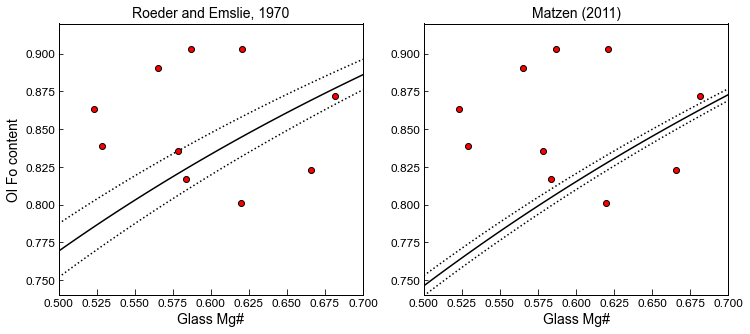

In [22]:
# Calculate Ol Fo contents to plot
Ol_Fo_Calc=pt.calculate_ol_fo(ol_comps=myOls1)
Liq_Mgno_calc=pt.calculate_liq_mgno(liq_comps=myLiquids1, Fe3Fet_Liq=0.2)
## Here we plot these results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.set_title('Roeder and Emslie, 1970')
# Plotting equilibrium lines
ax1.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Roeder (Kd=0.27)'], ':k')
ax1.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Roeder (Kd=0.33)'], ':k')
ax1.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Roeder (Kd=0.3)'], '-k')

# Plotting data
ax1.plot(Liq_Mgno_calc, Ol_Fo_Calc, 'ok', mfc='red')

ax2.set_title('Matzen (2011)')
# Plotting equilibrium lines
ax2.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Matzen (Kd=0.328)'], ':k')
ax2.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Matzen (Kd=0.352)'], ':k')
ax2.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Matzen (Kd=0.34)'], '-k')
# Plotting data
ax2.plot(Liq_Mgno_calc, Ol_Fo_Calc, 'ok', mfc='red')
ax1.set_ylabel('Ol Fo content')
ax1.set_xlabel('Glass Mg#')
ax2.set_xlabel('Glass Mg#')
ax1.set_ylim([0.74, 0.92])
ax2.set_ylim([0.74, 0.92])
ax1.set_xlim([0.5, 0.7])
ax2.set_xlim([0.5, 0.7])

# Or you could show the min and max to provide the full range using the fill between function

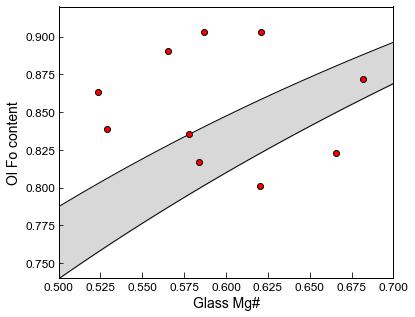

In [23]:
# Calculate Ol Fo contents to plot
Ol_Fo_Calc=pt.calculate_ol_fo(ol_comps=myOls1)
Liq_Mgno_calc=pt.calculate_liq_mgno(liq_comps=myLiquids1, Fe3Fet_Liq=0.2)
## Here we plot these results
fig, (ax1) = plt.subplots(1, 1, figsize=(6,5))

xfill_pap = np.sort(Rhodes['Mg#_Liq'])
y1fill_pap = Rhodes['Eq_Ol_Fo_Roeder (Kd=0.27)']
y2fill_pap = Rhodes['Eq_Ol_Fo_Matzen (Kd=0.352)']
ax1.fill_between(xfill_pap, y1fill_pap, y2fill_pap, where=y1fill_pap < y2fill_pap, interpolate=True, color='grey',  alpha=0.3)
ax1.fill_between(xfill_pap, y1fill_pap, y2fill_pap, where=y1fill_pap > y2fill_pap, interpolate=True, color='grey', linewidth=0.5, alpha=0.3)


# # Plotting equilibrium lines
ax1.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Roeder (Kd=0.27)'], '-k', linewidth=1)

ax1.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Matzen (Kd=0.352)'], '-k', linewidth=1)
# Plotting data
ax1.plot(Liq_Mgno_calc, Ol_Fo_Calc, 'ok', mfc='red')
ax1.set_ylabel('Ol Fo content')
ax1.set_xlabel('Glass Mg#')
ax1.set_ylim([0.74, 0.92]);
ax1.set_xlim([0.5, 0.7]);

## Calculating Fe3Fet_Liq using a buffer position to assess equilibrium
- Say we don't know the Fe3FeT_Liq we want to perform equilibrium calculations at, but we have reason to believe our system is buffered at NNO+1
- As liquid-olivine temperatures aren't sensitive to fo2, first we calculate temperature (as buffers are highly temperature-sensitive)

In [24]:
eq22_PHinput=pt.calculate_ol_liq_temp(liq_comps=myLiquids1, ol_comps=myOls1,  
                                      equationT="T_Put2008_eq22", P=my_input['P_kbar'])

- Then we use this function to convert NNO+1 to a Fe3/FeT ratio (the function returns a dataframe, and the variable we care about is Fe3Fet_Liq)

In [26]:
myLiquids_Fe3_Kress_no_norm_Fe3=pt.convert_fo2_to_fe_partition(liq_comps=myLiquids1, T_K=1190+273.15, 
                                          P_kbar=3, fo2="NNO", fo2_offset=1, model="Kress1991", renorm=False).Fe3Fet_Liq
myLiquids_Fe3_Kress_no_norm_Fe3

0    0.264889
1    0.260897
2    0.268157
3    0.263111
4    0.261131
5    0.262740
6    0.265025
7    0.237528
8    0.241604
9    0.265244
Name: Fe3Fet_Liq, dtype: float64

- We then input this into the calculate_ol_liq_temp function as Fe3Fet_Liq=....

In [27]:
eq22_PHinput_EqTests=pt.calculate_ol_liq_temp(liq_comps=myLiquids1, ol_comps=myOls1,  
                                      equationT=
                                              "T_Put2008_eq22", P=my_input['P_kbar'], eq_tests=True, 
                                    Fe3Fet_Liq=myLiquids_Fe3_Kress_no_norm_Fe3)
eq22_PHinput_EqTests

,T_K_calc,Kd Meas,Kd calc (Toplis),"ΔKd, Toplis","ΔKd, Roeder","ΔKd, Matzen",SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,...,Al2O3_Ol_cat_frac,Na2O_Ol_cat_frac,K2O_Ol_cat_frac,MnO_Ol_cat_frac,TiO2_Ol_cat_frac,DMg_Meas,CNML,CSiO2L,NF,Den_Beat93
0,1289.947705,0.342004,0.325040,0.016964,0.042004,0.002004,57.023602,0.623106,16.332899,4.36174,...,0.000772,0.0,0.0,0.001179,0.000123,9.472619,0.170395,0.557471,-0.761843,9.819071
1,1229.813416,0.189833,0.308684,0.118850,0.110167,0.150167,57.658600,0.654150,17.194799,3.90621,...,0.001039,0.0,0.0,0.000950,0.000181,14.186789,0.137941,0.570023,-0.816654,10.303635
2,1285.857491,0.294688,0.315891,0.021203,0.005312,0.045312,60.731201,0.862054,17.144199,4.07781,...,0.001083,0.0,0.0,0.001273,0.000314,15.531216,0.122184,0.579288,-0.792785,10.250501
3,1198.240159,0.188684,0.296719,0.108034,0.111316,0.151316,61.532799,0.440860,16.508801,3.32990,...,0.000967,0.0,0.0,0.001250,0.000309,23.753206,0.097626,0.605753,-0.767076,10.715090
4,1259.174284,0.164762,0.323766,0.159004,0.135238,0.175238,52.969101,0.803412,17.563000,5.93217,...,0.000963,0.0,0.0,0.000692,0.000000,10.781292,0.186877,0.523030,-0.842157,10.215321
5,1244.931462,0.173132,0.324986,0.151854,0.126868,0.166868,54.050201,0.857348,17.333300,5.60072,...,0.000964,0.0,0.0,0.001039,0.000123,12.276130,0.168070,0.533835,-0.833465,10.295063
6,1241.300118,0.235018,0.333878,0.098860,0.064982,0.104982,55.656300,0.897984,17.117800,5.31307,...,0.002155,0.0,0.0,0.001056,0.000250,14.083460,0.145845,0.547483,-0.820914,10.324021
7,1199.601831,0.424618,0.391378,0.033240,0.124618,0.084618,49.054699,0.488832,14.665000,5.83168,...,0.000595,0.0,0.0,0.001353,0.000253,7.372298,0.220053,0.554209,-0.789502,9.845140
8,1162.693468,0.331347,0.361834,0.030487,0.031347,0.008653,50.625099,0.334074,16.875000,5.01968,...,0.000594,0.0,0.0,0.001564,0.000316,10.509878,0.180293,0.551305,-0.873502,10.229233
9,1339.466029,0.467241,0.299720,0.167521,0.167241,0.127241,51.403301,0.663880,18.019600,5.98440,...,0.000589,0.0,0.0,0.001411,0.000188,7.070601,0.228386,0.498172,-0.840523,9.673734
